In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [2]:
impath = './dataset/mod/mod_1.jpg'

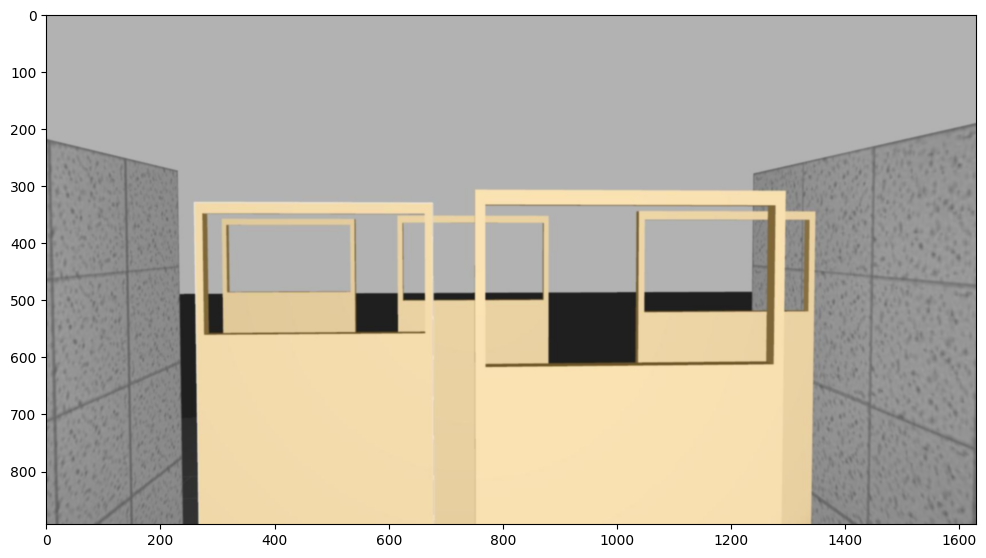

In [65]:
img = cv.imread(impath, cv.IMREAD_COLOR)
img = cv.GaussianBlur(img, (5, 5), 0)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# plt.axis('off')

# plt.subplot(2, 2, 1)
# plt.imshow(img)

# plt.subplot(2, 2, 2)
plt.imshow(rgb)

# plt.subplot(2, 2, 3)
# plt.imshow(gray, cmap="gray")

plt.show()

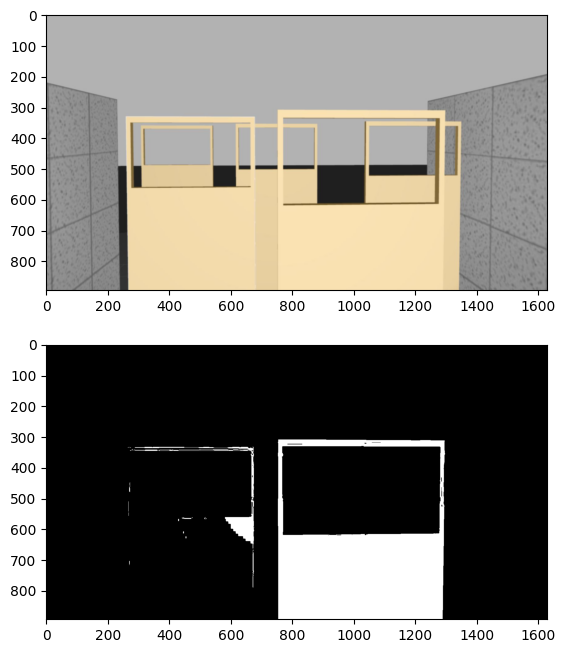

In [13]:
# HSV Mask on Image
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# #fae2b2
lower = np.array([15, 70, 245], dtype=np.uint8)
upper = np.array([25, 80, 255], dtype=np.uint8)

mask = cv.inRange(hsv, lower, upper)
masked = cv.bitwise_and(img, img, mask=mask)

gray_masked = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

# plt.subplot(2, 2, 1)
# plt.imshow(img)

plt.subplot(2, 1, 1)
plt.imshow(rgb)

plt.subplot(2, 1, 2)
plt.imshow(mask, cmap='gray')

# plt.subplot(2, 2, 4)
# plt.imshow(result)

In [44]:
kernel = np.ones((3, 3), dtype=np.uint8)
eroded = cv.erode(mask, kernel, iterations=3)
dilated = cv.dilate(mask, kernel, iterations=3)

opened = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel, iterations=3)
closed = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel, iterations=3)

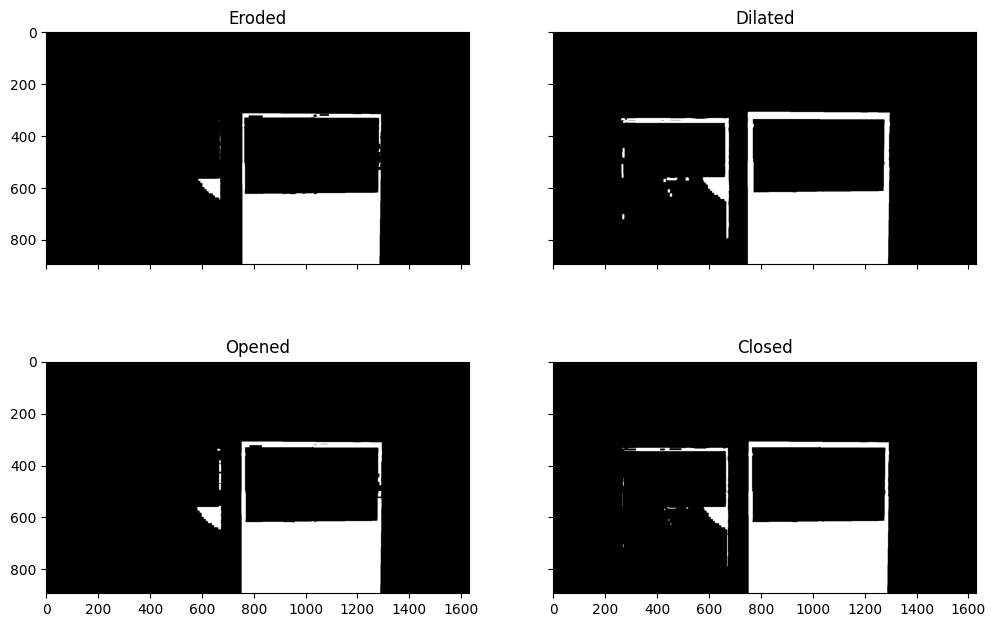

In [54]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(eroded, cmap='gray')
axs[0, 0].set_title('Eroded')
axs[0, 1].imshow(dilated, cmap='gray')
axs[0, 1].set_title('Dilated')
axs[1, 0].imshow(opened, cmap='gray')
axs[1, 0].set_title('Opened')
axs[1, 1].imshow(closed, cmap='gray')
axs[1, 1].set_title('Closed')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# fig.savefig('morph.png')

In [71]:
th_gaus = cv.adaptiveThreshold(closed, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 5)
th_mean = cv.adaptiveThreshold(closed, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 5)

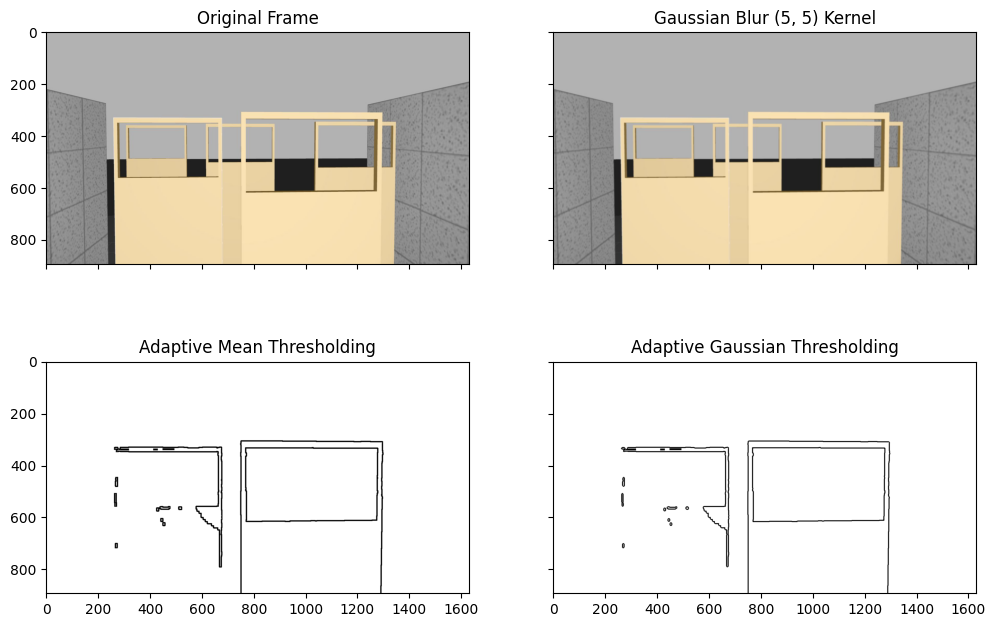

In [72]:
img = cv.imread(impath, cv.IMREAD_COLOR)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.GaussianBlur(rgb, (5, 5), 0)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(rgb)
axs[0, 0].set_title('Original Frame')
axs[0, 1].imshow(blur)
axs[0, 1].set_title('Gaussian Blur (5, 5) Kernel')
axs[1, 0].imshow(th_mean, cmap='gray')
axs[1, 0].set_title('Adaptive Mean Thresholding')
axs[1, 1].imshow(th_gaus, cmap='gray')
axs[1, 1].set_title('Adaptive Gaussian Thresholding')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# fig.savefig('morph.png')

In [59]:
img_open_edged = cv.Canny(opened, 30, 200)
img_close_edged = cv.Canny(closed, 30, 200)
img_gaus_edged = cv.Canny(th_gaus, 30, 200)
img_mean_edged = cv.Canny(th_mean, 30, 200)

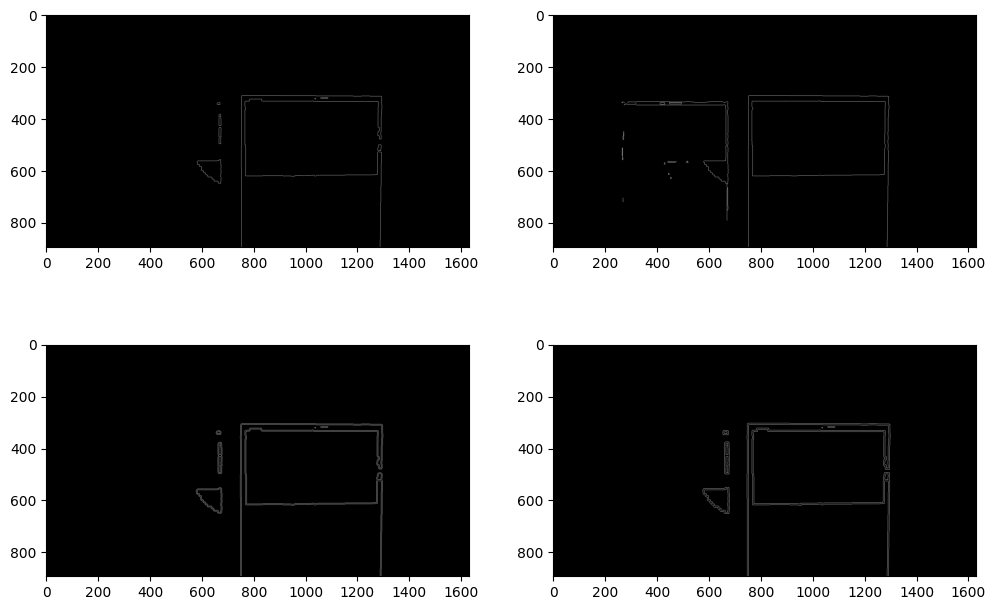

In [60]:
plt.subplot(2, 2, 1)
plt.imshow(img_open_edged, cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(img_close_edged, cmap='gray')

plt.subplot(2, 2, 3)
plt.imshow(img_gaus_edged, cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(img_mean_edged, cmap='gray')

In [90]:
img = cv.imread(impath, cv.IMREAD_COLOR)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

rgb_cont = rgb.copy()
rgb_rect = rgb.copy()

contours, hierarchy = cv.findContours(closed, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)

contour = max(contours, key=cv.contourArea)
boundingRect = cv.boundingRect(contour)

_ = cv.drawContours(rgb_cont, [contour], -1, (0, 255, 0), 3)
# _ = cv.drawContours(img, contours, -1, (0, 255, 0), 3)

_ = cv.rectangle(rgb_rect, boundingRect, color=(255, 0, 255), thickness=4)

_ = cv.circle(
    rgb_rect, 
    center=(boundingRect[0] + boundingRect[2] // 2, 450), 
    radius=1, 
    color=(0, 255, 255), 
    thickness=30
)


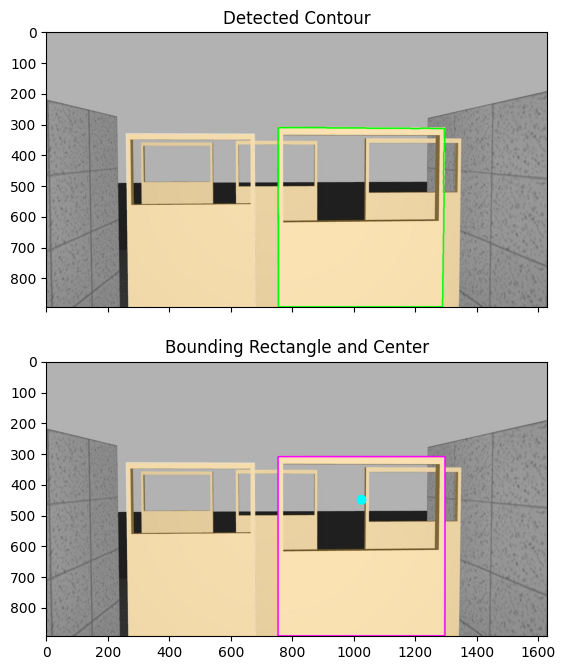

In [88]:
fig, axs = plt.subplots(2, 1)
axs[0].imshow(rgb_cont)
axs[0].set_title('Detected Contour')
axs[1].imshow(rgb_rect)
axs[1].set_title('Bounding Rectangle and Center')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# fig.savefig('morph.png')